In [13]:
# EPR Paradox Example

# A neutral pi meson (pi0) decays into an electron/positron (e-/e+) 
# pair.

# pi0 --> e+ + e- (electron-positron pair)
# pi0 has angular momentum l = s = 0

# Align electron and positron detectors in opposite directions.

# |            pi0            |
# |e- <------       ------> e+|

# Where hbar = 1, the measurement of the spin in some direction is 
# +/-1 with spin state [1 0] (up) or [0 1] (down).

# The Pauli exclusion principle with conserved angular momentum 0
# dictates this system must be in the singlet state 
# chi = [1/sqrt(2) (|up+>|down-> - |down+>|up->)].

# In this state, if the positron is measured to have spin [1 0], the 
# electron must have spin [0 1], or vice versa. There is an equal 
# probability to find either state during the first measurement.

# This view is consistent with the realist view. The realist view could 
# hold that the electron and position had those angular momenta 
# from creation.

# EPR assumes influences cannot propagate faster than the speed of 
# light. "Wave function collapse" is apparently instantaneous, however.


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

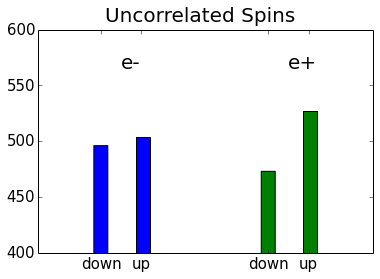

In [18]:
# If information about the measurement of the wave function propagated
# at a finite speed, the particles could conceivably be measured such
# that both are equally likely to hold either spin up or spin down.

# What would happen if the measurements were uncorrelated?

plt.hist(np.random.randint(0,2,1000),bins=4)
plt.hist(np.random.randint(3,5,1000),bins=4)
elepatch = mpatches.Patch(color='blue', label='e-')
pospatch = mpatches.Patch(color='orange', label='e+')
#plt.legend(handles=[elepatch,pospatch])
plt.text(0.5,565,"e-",size=20)
plt.text(3.5,565,"e+",size=20)

plt.suptitle("Uncorrelated Spins",fontsize=20)
plt.ylim([400,600])
plt.xlim([-1,5])
plt.xticks([0.125,0.85,3.125,3.85],["down","up","down","up"])
plt.tick_params(axis='both',labelsize=15)
plt.show()

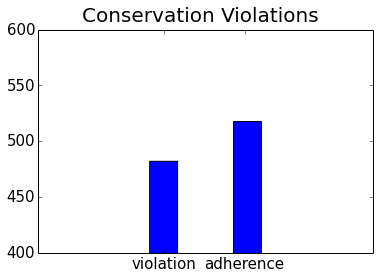

In [16]:
# How many violations of angular momentum would be measured?

# From running several simulations, it's evident a violation in the 
# conservation of angular momentum would be measured half of the time.
# We can conclude that the information that the entangled particles are in
# orthogonal spin states is instantaneously agreed once a measurement
# is made.

violations = 0

for trial in range(0,1000):
    elespin = np.random.randint(0,2)
    posspin = np.random.randint(0,2)
    if elespin == 0:
        elespin = np.matrix('0 1')
    else:
        elespin = np.matrix('1 0')
    if posspin == 0:
        posspin = np.matrix('0 1')
    else:
        posspin = np.matrix('1 0')
    
    elespin.transpose()
    posspin.transpose()
    chi_squared = elespin*np.matrix('1; 0')*posspin*np.matrix('0; 1') - posspin*np.matrix('1; 0')*elespin*np.matrix('0; 1')
    
    if chi_squared == 0:
        violations = violations + 1

zeroes = np.zeros(violations,dtype=int)
ones = np.full((1000-violations),1,dtype=int)
result = np.concatenate((ones,zeroes))

plt.ylim([400,600])
plt.xlim([-1,2])
plt.xticks([0.125,0.85],["violation","adherence"])
plt.tick_params(axis='both',labelsize=15)
plt.suptitle("Conservation Violations",fontsize=20)
plt.hist([result],bins=4)
plt.figure()

In [12]:
# Bell's Experiment took this a step further, to rule out locality 
# completely. Establish the detectors to "float" such that they 
# measure the components of the spins of the electron and positron 
# along a unit vector a or b, with angles phi_a and phi_b, 
# respectively. Compute a product P of the spins in units of hbar/2. 
# This will give +/-1. 

# /            pi0            \
# /e- <------       ------> e+\

# QM predicts P(a,b) = -a dot b, the expectation value of the product 
# of the spins.

# In 1964, Bell derived the Bell inequality for a local hidden variable
# theory:   abs(P(a,b) - P(a,c)) <= 1 + P(b,c)

# For any local hidden variable theory, the Bell inequality must hold. 
# It introduces a third unit vector c, which is any other unit vector 
# than a or b.

# Does the quantum mechanical prediction violate the Bell inequality?
# Testing several detector configurations in a plane, systematically 
# from 0 to pi, we determine whether the QM prediction is consistent 
# with a local hidden variable theory.

violations = 0
trials = 0
for step_a in range(0,6):
    for step_b in range (0,6):
        phi_a = step_a/6*np.pi
        phi_b = step_b/6*np.pi
        phi_c = phi_a - 0.5*phi_b
        P_ab = -1 * np.cos(phi_a - phi_b)
        P_ac = -1 * np.cos(phi_a - phi_c)
        P_bc = -1 * np.cos(phi_b - phi_c)
        
        bell_lhs = np.abs(P_ab - P_ac)
        bell_rhs = 1 + P_bc
        
        if bell_lhs > bell_rhs:
            violations = violations + 1
            
        trials = trials + 1
                
zeroes = np.zeros(violations,dtype=int)
ones = np.full((trials-violations),1,dtype=int)
result = np.concatenate((ones,zeroes))

plt.ylim([trials/2-10,trials/2+10])
plt.xlim([-1,2])
plt.xticks([0.125,0.85],["violation","adherence"])
plt.tick_params(axis='both',labelsize=15)
plt.suptitle("Hidden Locality Violations",fontsize=20)
plt.hist([result],bins=4)
plt.figure()

In [13]:
# It is seen that the QM prediction disagrees with a local hidden 
# variable theory in a significant number of configurations.

# On average, for random orientations between 0 and pi, how often? 
# After running several trials, it appears to be about half of the, 
# which is what one would expect from the quantum mechanical
# prediction.

violations = 0
trials = 0
for rand_a in range(0,10):
    for rand_b in range (0,10):
        phi_a = np.random.rand(1)*np.pi
        phi_b = np.random.rand(1)*np.pi
        phi_c = phi_a - 0.5*phi_b
        P_ab = -1 * np.cos(phi_a - phi_b)
        P_ac = -1 * np.cos(phi_a - phi_c)
        P_bc = -1 * np.cos(phi_b - phi_c)
        
        bell_lhs = np.abs(P_ab - P_ac)
        bell_rhs = 1 + P_bc
        
        if bell_lhs > bell_rhs:
            violations = violations + 1
            
        trials = trials + 1

zeroes = np.zeros(violations,dtype=int)
ones = np.full((trials-violations),1,dtype=int)
result = np.concatenate((ones,zeroes))

plt.ylim([trials/2-10,trials/2+10])
plt.xlim([-1,2])
plt.xticks([0.125,0.85],["violation","adherence"])
plt.tick_params(axis='both',labelsize=15)
plt.suptitle("Hidden Locality Violations",fontsize=20)
plt.hist([result],bins=4)
plt.figure()

In [14]:
# The prediction (Bell's inequality) made by assuming a local hidden
# variable is violated by a significant number of the possibile 
# bborientations. This simulation cannot determine which theory is
# correct, but the QM prediction has been confirmed through experiment.
# No hidden local variable holds actionable information about the 
# state. Entangled states retain their entanglement in a non-local 
# nature.

In [15]:
plt.show()